In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from pylab import rcParams

/tmp/ipykernel_81764/1396264545.py:7: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr
/tmp/ipykernel_81764/1396264545.py:8: DeprecationWarning: Please import `spearmanr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import spearmanr


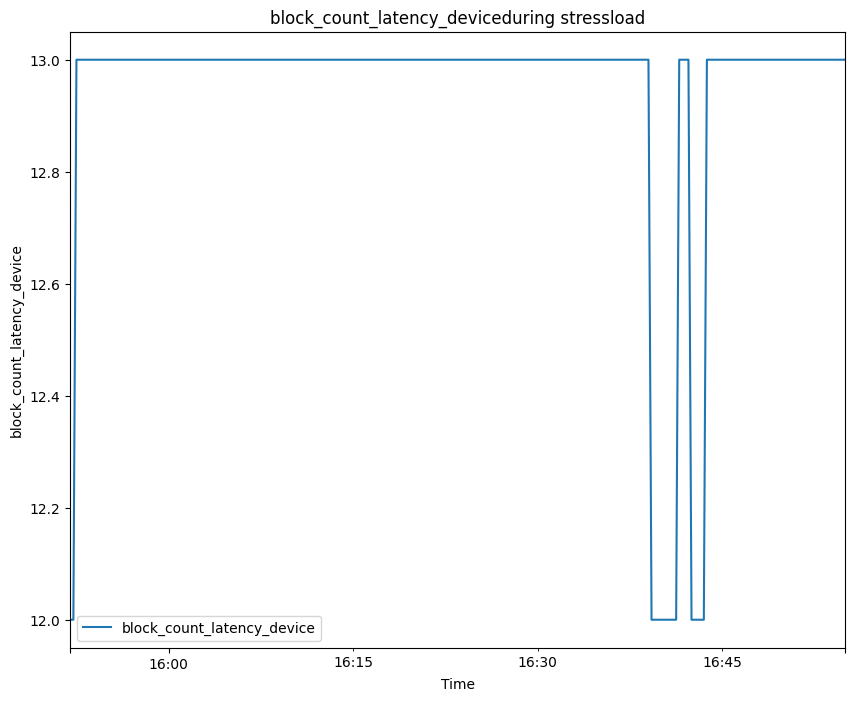

In [ ]:
df = pd.read_csv('block_count_latency_device.csv', parse_dates=['Time'], index_col='Time')

df.columns = ['block_count_latency_device']
ax = df.plot(figsize=(10,8))
ax.set_xlabel('Time')
ax.set_ylabel('block_count_latency_device')
ax.set_title('block count latency device during stressload')
plt.show()


In [ ]:
df_mean = df.rolling(window=4).mean()  #window every 1 minute, so 4 data points
ax = df_mean.plot(figsize=(10,8))
ax.set_xlabel('Time')
ax.set_ylabel('block count latency device')
ax.set_title('block count latency device during stressload')

plt.show()

Text(0.5, 1.0, 'boxplot of block count latency device')

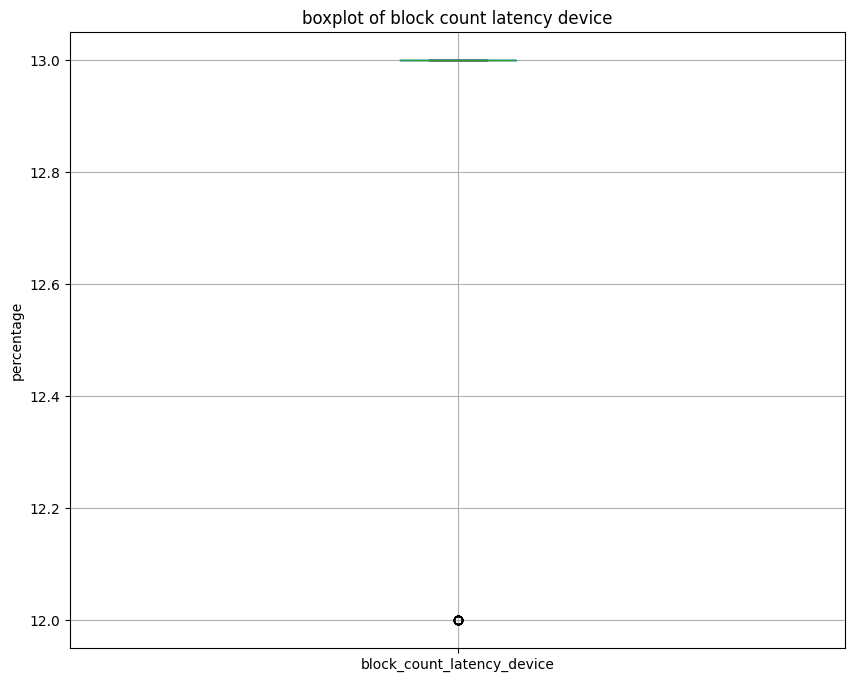

In [6]:
ax1 = df.boxplot(figsize=(10,8))
ax1.set_ylabel('percentage')
ax1.set_title('boxplot of block count latency device')


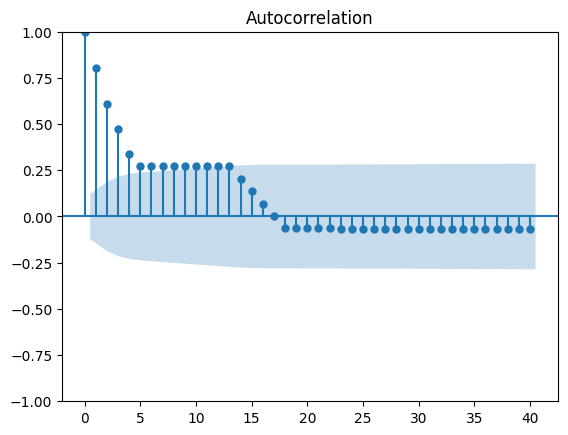

In [8]:
fig = tsaplots.plot_acf(df['block_count_latency_device'], lags=40)
plt.show()

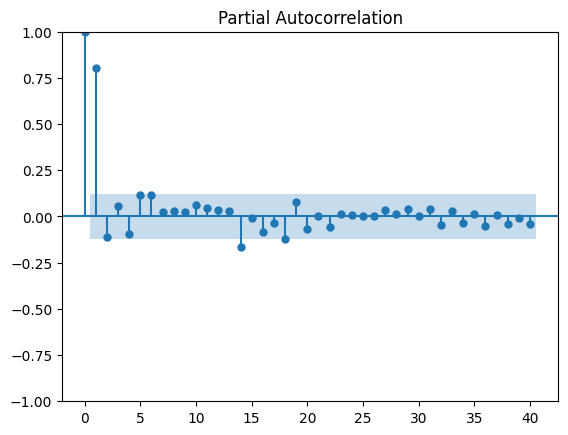

In [9]:
fig = tsaplots.plot_pacf(df['block_count_latency_device'], lags=40)  #to see the lags
plt.show()

/tmp/ipykernel_81764/3783895059.py:2: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df = df.asfreq('15S')


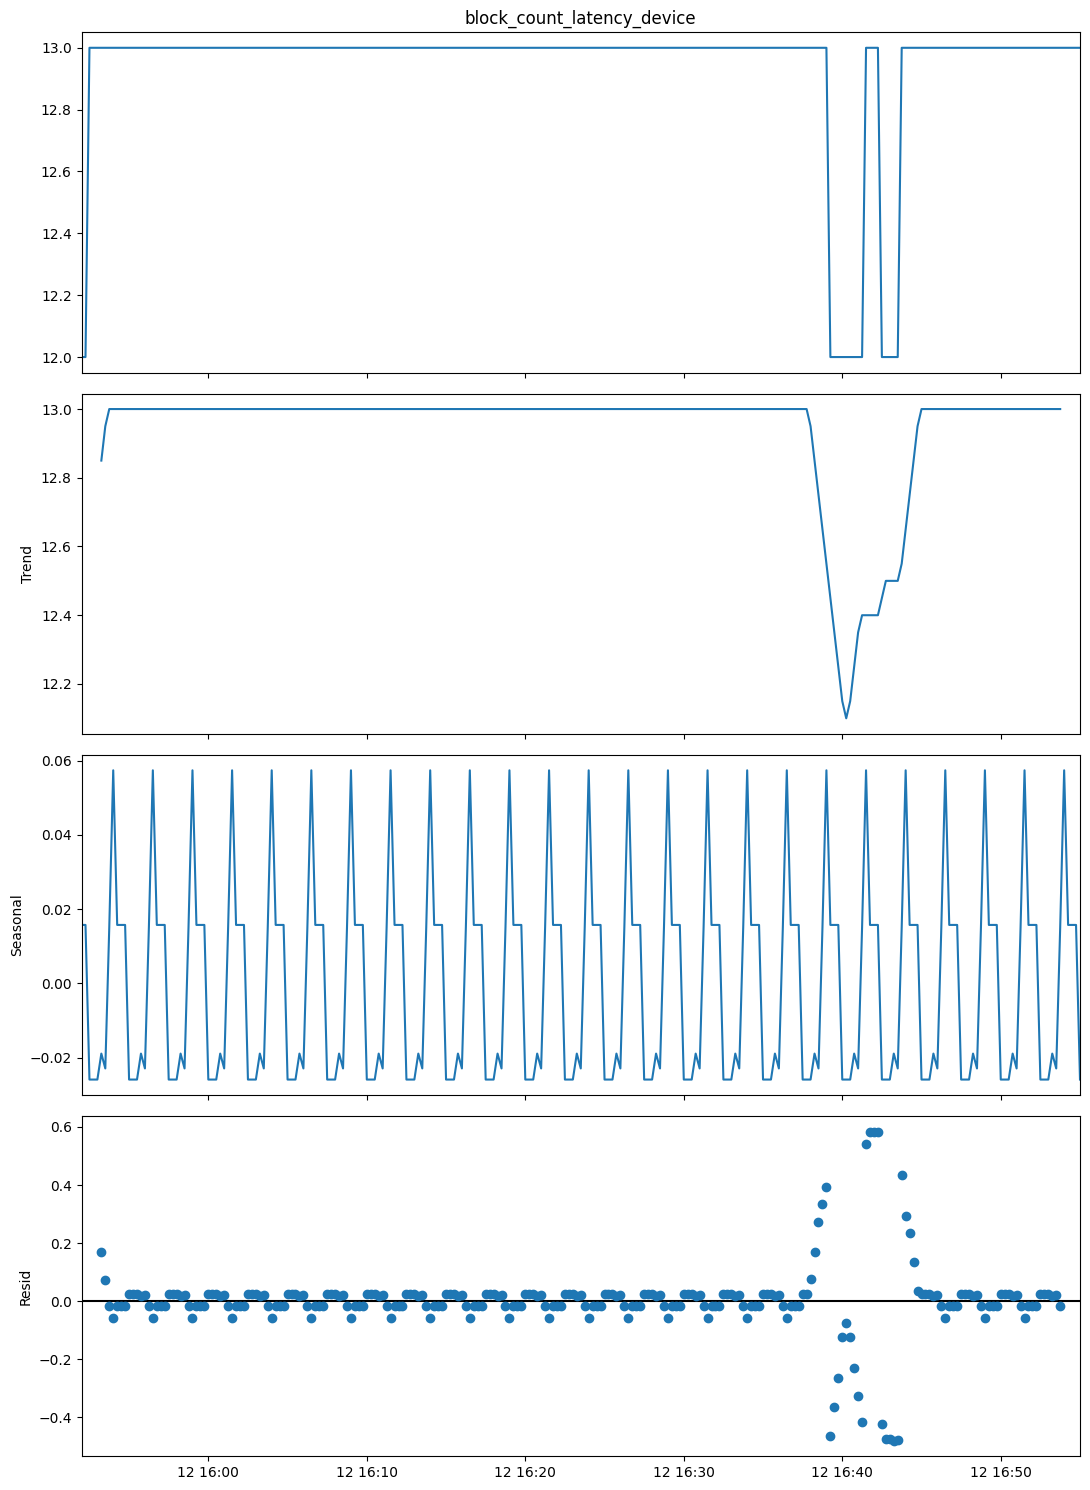

In [10]:
df.index = pd.to_datetime(df.index)
df = df.asfreq('15S') 
rcParams['figure.figsize'] = 11, 15  
decomposition = sm.tsa.seasonal_decompose(df['block_count_latency_device'], model='additive', period=10)  #check period and adjust
fig = decomposition.plot()
plt.show()